<!-- ![title](./Desktop/tokyo-wallpaper.jpg) -->

# SUPERVISED LEARNING (yeo-johnson)
- by Giovaldi R C

Saya menggunakan Yeo Johnson karena ini merupakan salah satu metode power transformer yang ditawarkan sklearn yang mana untuk mengatasi data dengan distribusi tidak normal. Cara kerjanya itu yaitu mencari pangkat terbaik untuk membuat data menjadi distribusi normal. Sebenarnya selain Yeo-Johnson. Ada Box-Cox yang memiliki konsep sama tp hanya bisa mengatasi skew positif saja sehingga kurang efektif apabila dilihat dari visualisasi distplot sebelumnya. 

# Import Package

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import joblib
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from feature_engine.outlier_removers import Winsorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from collections import Counter
import scipy.stats as ss
import math
from xgboost import XGBRegressor

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
%matplotlib inline

In [368]:
print('numpy version:', np.__version__,'per Agustus 2020')
print('pandas version:', pd.__version__,'per Agustus 2020')
print('scikit-learn version:', sklearn.__version__,'per Agustus 2020')

numpy version: 1.19.1 per Agustus 2020
pandas version: 1.1.0 per Agustus 2020
scikit-learn version: 0.23.1 per Agustus 2020


In [369]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Import Data

In [370]:
airbnbl = pd.read_csv('./Desktop/airbnb__1.csv')

In [371]:
airbnbl.head()

,host_id,name,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,host_since,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,longitude,latitude,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,151977,"La Casa Gaienmae C Harajuku, Omotesando is nearby",f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,2010-06-25,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,0.18,94.0,89,1,1.0,1.0,1,139.71203,35.67152,100.0,96.488942,4192.0,30000.0,5000.0,0.0
1,964081,Oshiage Holiday Apartment,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Sumida Ku,2011-08-13,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130003350,f,moderate,1.56,95.0,270,1,2.0,1.0,2,139.82596,35.71721,86.0,100.000000,10965.0,40000.0,5000.0,0.0
2,341577,Private apt in central Tokyo #203,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Nerima Ku,2011-01-10,Apartment,Entire home/apt,"{TV,Wifi,""Air conditioning"",Kitchen,""Hot tub"",...",Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...,f,strict_14_with_grace_period,1.17,95.0,242,1,1.0,1.0,2,139.65810,35.74267,82.0,100.000000,4192.0,32250.0,5375.0,1075.0
3,1573631,"Cozy flat #203, local area YET 10 mins to shib...",t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Setagaya Ku,2012-01-06,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called Setagaya ku hokenjo ...,f,moderate,1.37,95.0,364,1,1.0,0.0,2,139.65707,35.66443,92.0,100.000000,6987.0,20000.0,6000.0,0.0
4,341577,Private apt in central Tokyo #201,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,Nerima Ku,2011-01-10,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...,f,strict_14_with_grace_period,1.12,96.0,353,1,1.0,1.0,2,139.65832,35.74264,82.0,100.000000,3977.0,32250.0,5375.0,1075.0


In [372]:
airbnbl.shape 

(12600, 28)

In [373]:
airbnbl.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [374]:
airbnb_describe =[]

for i in airbnbl.columns:
    airbnb_describe.append([
        i,
        airbnbl[i].dtypes,
        airbnbl[i].isna().sum(),
        round((((airbnbl[i].isna().sum())/(len(airbnbl)))*100),2),
        airbnbl[i].nunique(),
        airbnbl[i].unique()
    ])

In [375]:
DESC = pd.DataFrame(airbnb_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

,column,type,nan,nan%,nunique,unique
0,host_id,int64,0,0.0,3236,"[151977, 964081, 341577, 1573631, 4799233, 484..."
1,name,object,0,0.0,11669,"[La Casa Gaienmae C Harajuku, Omotesando is ne..."
2,host_is_superhost,object,0,0.0,2,"[f, t]"
3,host_verifications,object,0,0.0,203,"[['email', 'phone', 'facebook', 'reviews', 'ju..."
4,host_identity_verified,object,0,0.0,2,"[t, f]"
5,neighbourhood_cleansed,object,0,0.0,55,"[Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku..."
6,host_since,object,0,0.0,1638,"[2010-06-25, 2011-08-13, 2011-01-10, 2012-01-0..."
7,property_type,object,0,0.0,28,"[Apartment, House, Serviced apartment, Condomi..."
8,room_type,object,0,0.0,4,"[Private room, Entire home/apt, Shared room, H..."
9,amenities,object,0,0.0,9182,"[{TV,Internet,Wifi,Kitchen,""Paid parking off p..."


In [376]:
airbnb= airbnbl[(airbnbl['availability_365']<=180)&(airbnbl['availability_365']!=0)]

In [377]:
airbnb.dtypes

host_id                     int64
name                       object
host_is_superhost          object
host_verifications         object
host_identity_verified     object
neighbourhood_cleansed     object
host_since                 object
property_type              object
room_type                  object
amenities                  object
license                    object
instant_bookable           object
cancellation_policy        object
reviews_per_month         float64
review_scores_rating      float64
availability_365            int64
guests_included             int64
beds                      float64
bedrooms                  float64
accommodates                int64
longitude                 float64
latitude                  float64
host_acceptance_rate      float64
host_response_rate        float64
price                     float64
security_deposit          float64
cleaning_fee              float64
extra_people              float64
dtype: object

# HANDLING OUTLIERS

## Discover outliers with visualization tools : 
  - Box plot =  is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.
  - Histogram

## Working with Outliers: Correcting, Removing, Leave it
  
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://www.udemy.com/course/feature-engineering-for-machine-learning/learn/lecture/8749894#announcements

https://www.slideshare.net/rizka_safa/momen-kemiringan-dankeruncingan7

In [378]:
airbnb['price'].head()

0     4192.0
5     7955.0
6     5160.0
8     6987.0
10    3547.0
Name: price, dtype: float64

In [379]:
airbnb.skew()

host_id                 -0.106253
reviews_per_month        2.590106
review_scores_rating    -2.784883
availability_365        -0.162022
guests_included          2.492380
beds                     5.446727
bedrooms                13.273677
accommodates             1.645852
longitude               -2.233014
latitude               -17.016600
host_acceptance_rate    -5.328615
host_response_rate      -5.698404
price                   12.643910
security_deposit        11.368452
cleaning_fee             2.350679
extra_people             4.650069
dtype: float64

In [380]:
airbnb.kurt()

host_id                  -1.265011
reviews_per_month        23.526141
review_scores_rating     13.857967
availability_365         -1.017524
guests_included           9.369917
beds                     75.405336
bedrooms                386.730254
accommodates              2.839425
longitude                12.125590
latitude                427.891348
host_acceptance_rate     38.295208
host_response_rate       37.909600
price                   205.558677
security_deposit        164.933897
cleaning_fee             14.885028
extra_people             71.234601
dtype: float64

In [381]:
def diagnostic_plots(airbnb,variabel):
    #ukuran
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    sns.distplot(airbnb[variabel],bins=30)
    plt.title("Histogram")
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=airbnb[variabel])
    plt.title("Boxplot")
    
    plt.show()

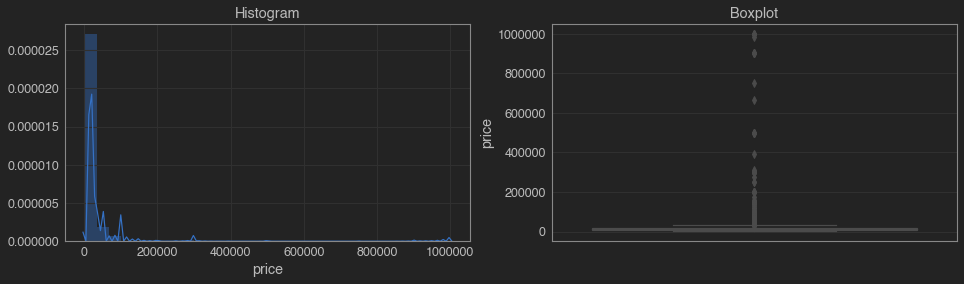

In [382]:
diagnostic_plots(airbnb,'price')

In [383]:
airbnb['price'] = PowerTransformer().fit_transform(airbnb[['price']])

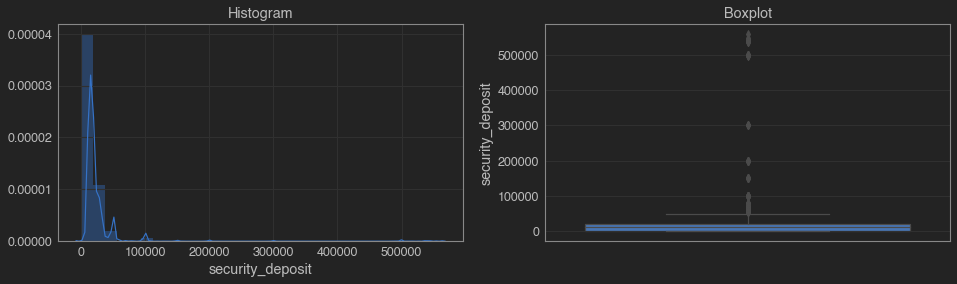

In [384]:
diagnostic_plots(airbnb,'security_deposit')

In [385]:
airbnb['security_deposit'] = PowerTransformer().fit_transform(airbnb[['security_deposit']])

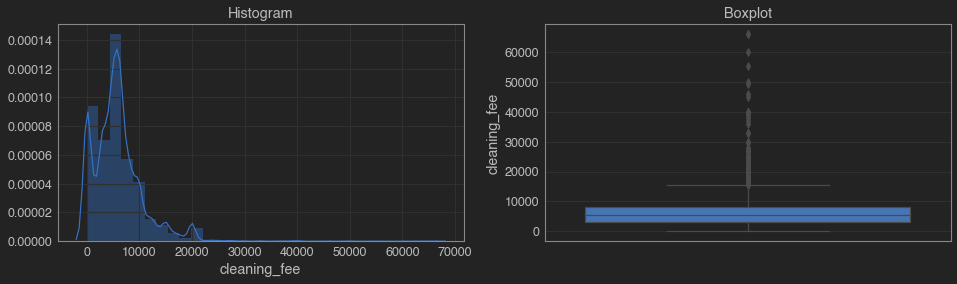

In [386]:
diagnostic_plots(airbnb,'cleaning_fee')

In [387]:
airbnb['cleaning_fee'] = PowerTransformer().fit_transform(airbnb[['cleaning_fee']])

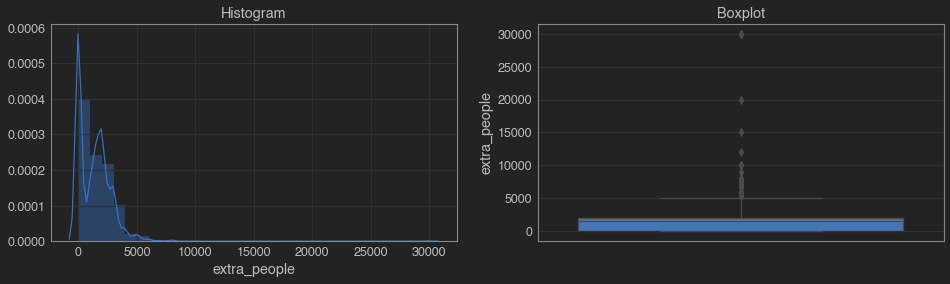

In [388]:
diagnostic_plots(airbnb,'extra_people')

In [389]:
airbnb['extra_people'] = PowerTransformer().fit_transform(airbnb[['extra_people']])

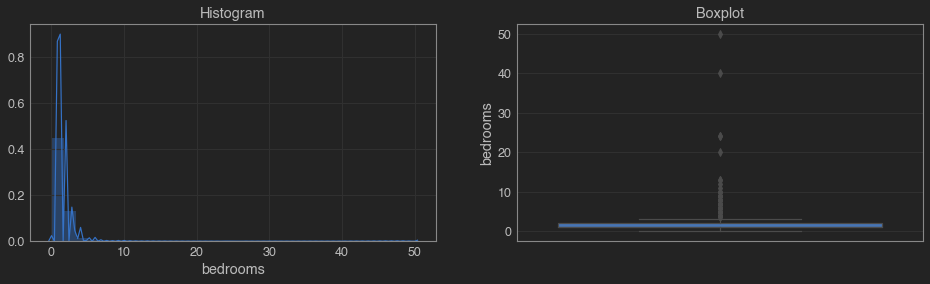

In [390]:
diagnostic_plots(airbnb,'bedrooms')

In [391]:
airbnb['bedrooms'] = PowerTransformer().fit_transform(airbnb[['bedrooms']])

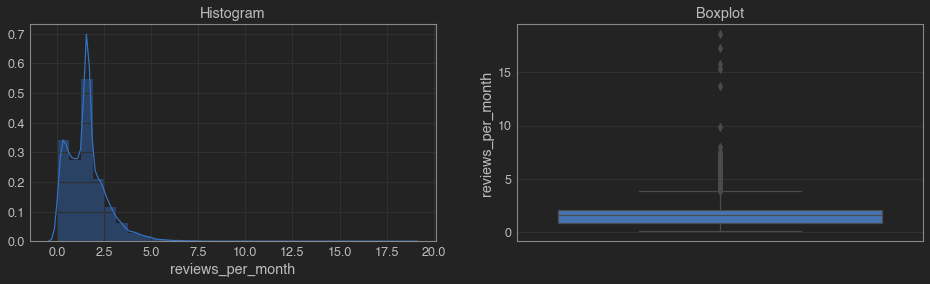

In [392]:
diagnostic_plots(airbnb,'reviews_per_month')

In [393]:
airbnb['reviews_per_month'] = PowerTransformer().fit_transform(airbnb[['reviews_per_month']])

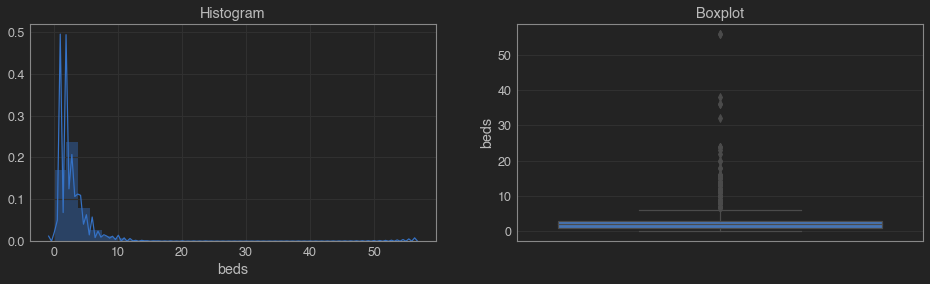

In [394]:
diagnostic_plots(airbnb,'beds')

In [395]:
airbnb['beds'] = PowerTransformer().fit_transform(airbnb[['beds']])

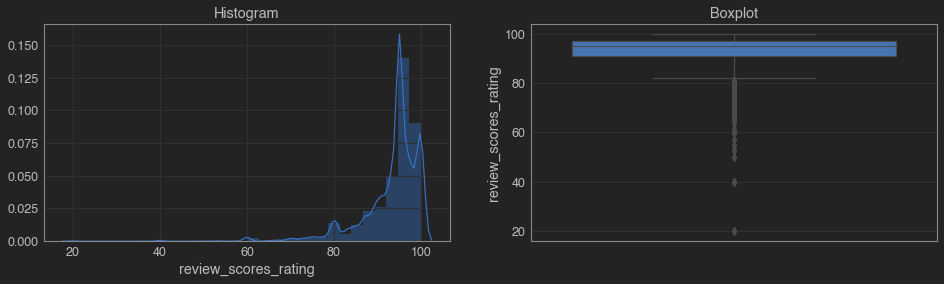

In [396]:
diagnostic_plots(airbnb,'review_scores_rating')

In [397]:
airbnb['review_scores_rating'] = PowerTransformer().fit_transform(airbnb[['review_scores_rating']])

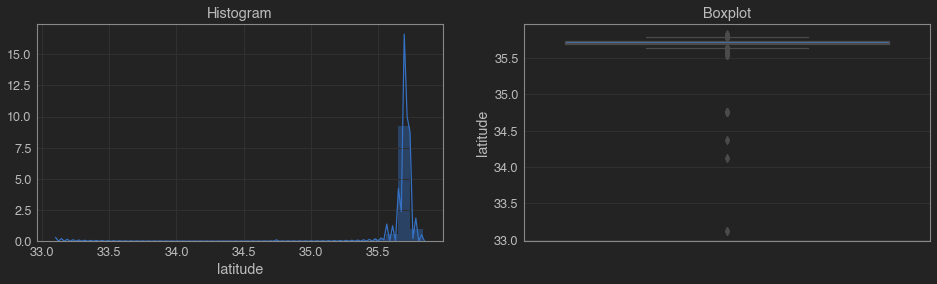

In [398]:
diagnostic_plots(airbnb,'latitude')

In [399]:
airbnb['latitude'] = PowerTransformer().fit_transform(airbnb[['latitude']])

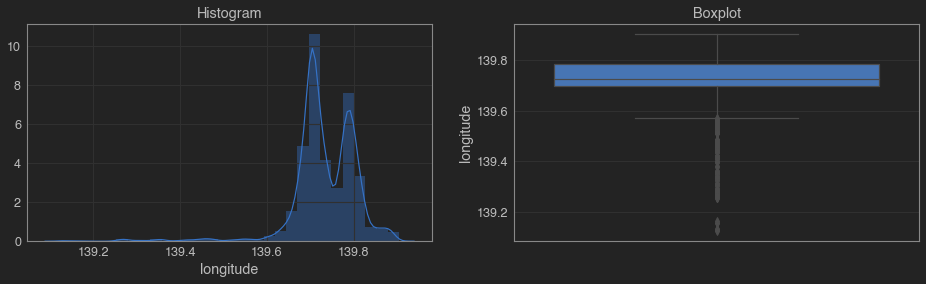

In [400]:
diagnostic_plots(airbnb,'longitude')

In [401]:
airbnb['longitude'] = PowerTransformer().fit_transform(airbnb[['longitude']])

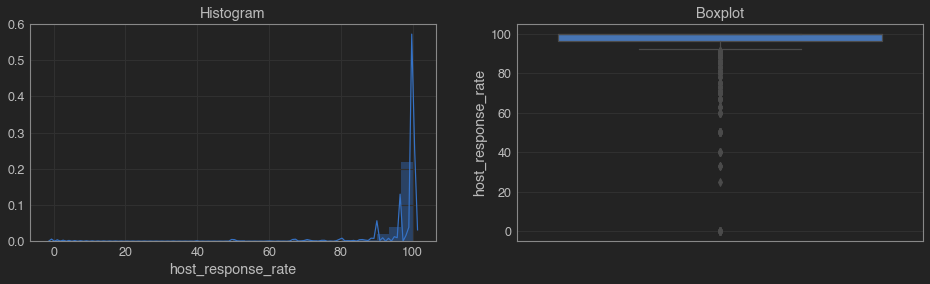

In [402]:
diagnostic_plots(airbnb,'host_response_rate')

In [403]:
airbnb['host_response_rate'] = PowerTransformer().fit_transform(airbnb[['host_response_rate']])

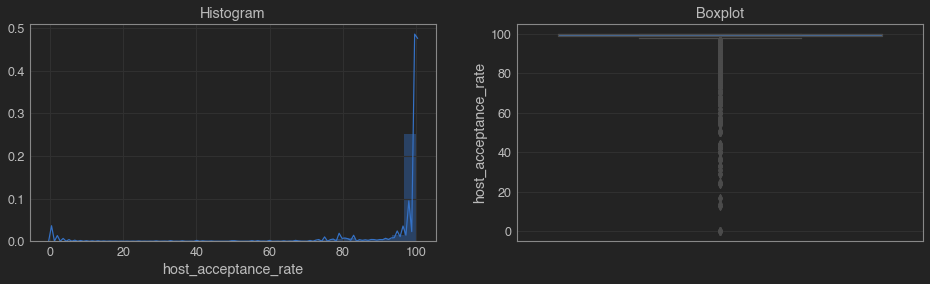

In [404]:
diagnostic_plots(airbnb,'host_acceptance_rate')

In [405]:
airbnb['host_acceptance_rate'] = PowerTransformer().fit_transform(airbnb[['host_acceptance_rate']])

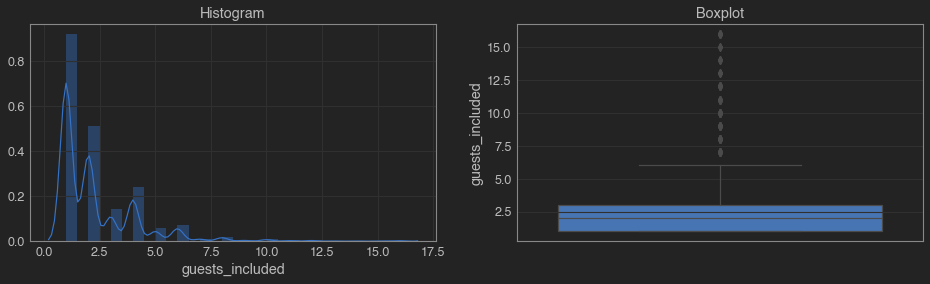

In [406]:
diagnostic_plots(airbnb,'guests_included')

In [407]:
airbnb['guests_included'] = PowerTransformer().fit_transform(airbnb[['guests_included']])

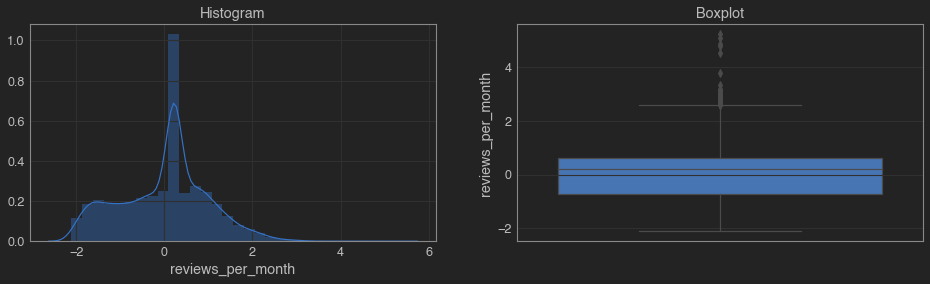

In [408]:
diagnostic_plots(airbnb,'reviews_per_month')

In [409]:
airbnb['reviews_per_month'] = PowerTransformer().fit_transform(airbnb[['reviews_per_month']])

In [410]:
airbnb.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [411]:
airbnb.skew()

host_id                -0.106253
reviews_per_month       0.099438
review_scores_rating   -0.269132
availability_365       -0.162022
guests_included         0.287814
beds                   -0.014084
bedrooms               -0.064853
accommodates            1.645852
longitude              -1.746020
latitude               -1.969010
host_acceptance_rate   -1.626319
host_response_rate     -1.929349
price                  -0.040345
security_deposit       -0.037094
cleaning_fee           -0.591013
extra_people           -0.394742
dtype: float64

In [412]:
airbnb.kurt()

host_id                 -1.265011
reviews_per_month        0.167558
review_scores_rating    -0.545680
availability_365        -1.017524
guests_included         -1.437158
beds                     0.518666
bedrooms                 1.945152
accommodates             2.839425
longitude                8.763657
latitude                13.464822
host_acceptance_rate     1.233545
host_response_rate       2.630247
price                    0.930884
security_deposit        -1.960547
cleaning_fee             0.407708
extra_people            -1.700356
dtype: float64

In [413]:
airbnb.columns

Index(['host_id', 'name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy', 'reviews_per_month',
       'review_scores_rating', 'availability_365', 'guests_included', 'beds',
       'bedrooms', 'accommodates', 'longitude', 'latitude',
       'host_acceptance_rate', 'host_response_rate', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [414]:
airbnb.drop(['longitude','latitude'],axis=1,inplace=True)

In [415]:
airbnb.drop(['host_since'],axis=1,inplace=True)

In [416]:
airbnb.drop(['name'],axis=1,inplace=True)

# RECATEGORIZE

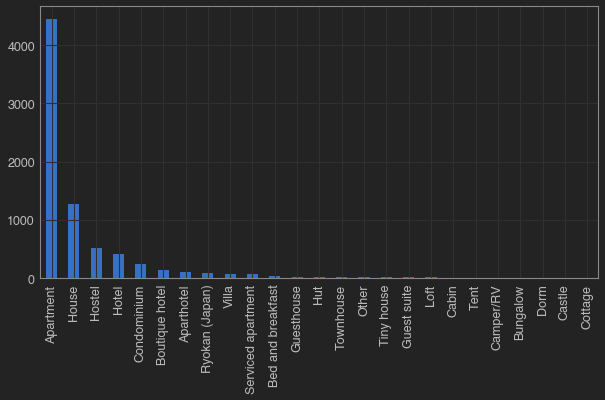

In [417]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

Berdasarkan data diatas, keberagaman property sangat banyak. Akan tetapi, ada beberapa yang bisa di kelompokkan seperti House, Townhouse, Tiny house, Guesthouse. Lalu Apartment dengan serviced apartment. Kemudian tent,camper,hut bisa dimasukkan Other. Begitupun dengan yang lain

In [418]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "House" if x=="Townhouse" or x=="Tiny house" or x=="Guesthouse" else x)

In [419]:
sum(airbnb["property_type"] == "Other")

14

In [420]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Apartment" if x=="Serviced apartment" else x)

In [421]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Hotel" if x== "Bed and breakfast" else x)

In [422]:
to_other = []
for x in airbnb["property_type"].unique():
    if sum(airbnb["property_type"] == x) < sum(airbnb["property_type"] == "Other"):
        to_other.append(x)
to_other

['Guest suite',
 'Loft',
 'Tent',
 'Camper/RV',
 'Cabin',
 'Bungalow',
 'Dorm',
 'Cottage',
 'Castle']

In [423]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x in to_other else x)

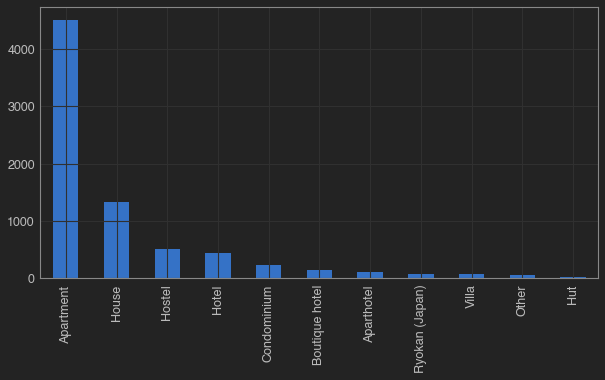

In [424]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

In [425]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x== "Hut" else x)

In [426]:
airbnb["property_type"] = airbnb["property_type"].apply(lambda x: "Hotel" if x== "Boutique hotel" else x)

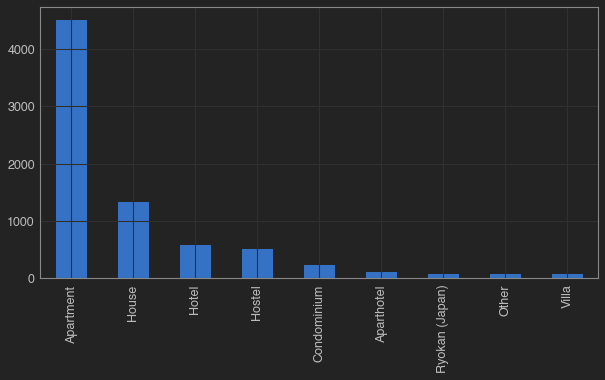

In [427]:
plt.figure(figsize=(10,5))
airbnb["property_type"].value_counts().plot(kind="bar")

In [428]:
airbnb.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,151977,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,-1.727914,-0.151187,89,-0.999811,-0.881228,-0.196194,1,0.578941,-0.447789,-1.122754,1.058515,0.111843,-1.256477
5,1573631,t,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Setagaya Ku,House,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | We called and got confirmation...,f,moderate,-1.117021,0.312485,33,-0.999811,-0.075088,0.879907,3,-1.923897,0.521676,-0.344159,1.019446,0.598914,0.231182
6,4799233,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shinjuku Ku,Apartment,Entire home/apt,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...,f,moderate,-0.384871,-0.865980,172,0.929875,0.872376,-0.196194,3,0.578941,0.521676,-0.862851,-1.027417,-0.317054,-1.256477
8,5596383,t,"['email', 'phone', 'reviews', 'manual_offline'...",t,Setagaya Ku,House,Private room,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130001107,t,moderate,0.912146,1.174775,2,-0.999811,-0.881228,-0.196194,2,0.578941,0.521676,-0.496472,0.971742,-0.087138,1.344410
10,5686404,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Adachi Ku,House,Private room,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",M130007760,f,strict_14_with_grace_period,-0.266832,-0.151187,92,-0.999811,-0.075088,-0.196194,2,-2.393360,0.521676,-1.337103,0.910420,-0.596423,0.777596


# ADDING FEATURE

In [429]:
airbnb['neighbourhood_cleansed'].nunique()

51

In [430]:
airbnb.loc[(airbnb['neighbourhood_cleansed'] == 'Shinjuku Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Taito Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Toshima Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Sumida Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Shibuya Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Minato Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Arakawa Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Nakano Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Ota Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Chuo Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Kita Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Katsushika Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Itabashi Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Setagaya Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Suginami Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Edogawa Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Adachi Ku') ,
           'Posisi'] = 'Dekat'
airbnb.loc[(airbnb['neighbourhood_cleansed'] == 'Chiyoda Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Koto Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Kokubunji Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Shinagawa Ku') | 
           (airbnb['neighbourhood_cleansed'] == 'Bunkyo Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Nerima Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Hachioji Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Meguro Ku') |
           (airbnb['neighbourhood_cleansed'] == 'Machida Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Oshima Machi') |
           (airbnb['neighbourhood_cleansed'] == 'Hino Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Nishitokyo Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Mitaka Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Musashino Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Kunitachi Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Chofu Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Kodaira Shi') ,
           'Posisi'] = 'Menengah'
airbnb.loc[(airbnb['neighbourhood_cleansed'] == 'Higashimurayama Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Hinohara Mura') | 
           (airbnb['neighbourhood_cleansed'] == 'Tama Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Ome Shi') | 
           (airbnb['neighbourhood_cleansed'] == 'Okutama Machi') |
           (airbnb['neighbourhood_cleansed'] == 'Hachijo Machi') |
           (airbnb['neighbourhood_cleansed'] == 'Higashikurume Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Miyake Mura') |
           (airbnb['neighbourhood_cleansed'] == 'Inagi Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Akishima Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Niijima Mura') |
           (airbnb['neighbourhood_cleansed'] == 'Koganei Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Fuchu Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Higashiyamato Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Fussa Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Komae Shi') |
           (airbnb['neighbourhood_cleansed'] == 'Musashimurayama Shi') ,
           'Posisi'] = 'Jauh'

In [431]:
airbnb["host_id"] = airbnb["host_id"].astype(str)

# ENCODE
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159



In [432]:
airbnb.head(1)

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,cancellation_policy,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,Posisi
0,151977,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Shibuya Ku,Apartment,Private room,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,f,strict_14_with_grace_period,-1.727914,-0.151187,89,-0.999811,-0.881228,-0.196194,1,0.578941,-0.447789,-1.122754,1.058515,0.111843,-1.256477,Dekat


In [433]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['host_id','neighbourhood_cleansed','room_type','property_type','host_identity_verified','host_is_superhost','instant_bookable','Posisi'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [434]:
# onehot_en = ce.OneHotEncoder(cols=['neighbourhood_cleansed',
#                                    'room_type',
#                                    'property_type',
#                                    'host_identity_verified',
#                                    'host_is_superhost',
#                                    'instant_bookable'], use_cat_names=True)
# airbnb = onehot_en.fit_transform(airbnb)

In [435]:
airbnb= airbnb_en

In [436]:
airbnb.shape

(7526, 25)

# ORDINAL ENCODING


In [437]:
airbnb['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible', 'strict',
       'super_strict_60', 'super_strict_30'], dtype=object)

In [438]:
airbnb1=airbnb.copy()
cpdictionary = {'strict_14_with_grace_period':0,'moderate':1,'flexible':2,'strict':3,'super_strict_60':4,'super_strict_30':5}
airbnb1['cancellation'] = airbnb1.cancellation_policy.map(cpdictionary)

In [439]:
airbnb1.drop(['cancellation_policy'],axis=1,inplace=True)

In [440]:
airbnb1.head(1)

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,license,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,0,-1.727914,-0.151187,89,-0.999811,-0.881228,-0.196194,1,0.578941,-0.447789,-1.122754,1.058515,0.111843,-1.256477,0,0


# FREQUENCY ENCODING
https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [441]:
airbnb1['license'].describe()

count                                                  7526
unique                                                 4597
top       Other reasons | 弊社がリスティングする物件につきましては、全て「最低30泊」...
freq                                                     58
Name: license, dtype: object

In [442]:
airbnb2 = airbnb1.copy()
frekuensi = airbnb2.groupby('license').size()/len(airbnb2)
airbnb2['license_'] = airbnb2['license'].map(frekuensi)

In [443]:
airbnb2.drop(['license'],axis=1,inplace=True)

In [444]:
airbnb2.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",0,-1.727914,-0.151187,89,-0.999811,-0.881228,-0.196194,1,0.578941,-0.447789,-1.122754,1.058515,0.111843,-1.256477,0,0,0.000133
5,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,1,1,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,-1.117021,0.312485,33,-0.999811,-0.075088,0.879907,3,-1.923897,0.521676,-0.344159,1.019446,0.598914,0.231182,0,1,0.000266
6,2,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,2,0,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,-0.384871,-0.865980,172,0.929875,0.872376,-0.196194,3,0.578941,0.521676,-0.862851,-1.027417,-0.317054,-1.256477,0,1,0.000133
8,3,1,"['email', 'phone', 'reviews', 'manual_offline'...",0,1,1,0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1,0.912146,1.174775,2,-0.999811,-0.881228,-0.196194,2,0.578941,0.521676,-0.496472,0.971742,-0.087138,1.344410,0,1,0.000133
10,4,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,3,1,0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,-0.266832,-0.151187,92,-0.999811,-0.075088,-0.196194,2,-2.393360,0.521676,-1.337103,0.910420,-0.596423,0.777596,0,0,0.000133


# EXTRACT

In [445]:
airbnb2["amenities"] = airbnb2["amenities"].apply(lambda x: x.strip('{}').replace('"','').split(','))

In [446]:
def item_counter(item):
    count = 0
    for i in airbnb2.index:
        if item in airbnb2["amenities"][i]:
            count += 1
    return count

In [447]:
(item_counter("Hot tub")/len(airbnb2))*100

10.775976614403401

In [448]:
(item_counter("Buzzer/wireless intercom")/len(airbnb2))*100

3.6407121977145893

In [449]:
(item_counter("Family/kid friendly")/len(airbnb2))*100

17.313313845336168

In [450]:
(item_counter("Dryer")/len(airbnb2))*100

26.85357427584374

In [451]:
(item_counter("Shampoo")/len(airbnb2))*100

96.33271326069625

In [452]:
(item_counter("Hangers")/len(airbnb2))*100

85.38400212596333

In [453]:
(item_counter("Iron")/len(airbnb2))*100

57.32128620781292

In [454]:
(item_counter("Self check-in")/len(airbnb2))*100

38.506510762689345

In [455]:
(item_counter("Lockbox")/len(airbnb2))*100

22.933829391443

In [456]:
(item_counter("Dishes and silverware")/len(airbnb2))*100

61.09487111347329

In [457]:
(item_counter("Safety card")/len(airbnb2))*100

10.337496678182301

In [458]:
(item_counter("Room-darkening shades")/len(airbnb2))*100

20.14350252458145

In [459]:
(item_counter("Hot water")/len(airbnb2))*100

76.92001062981663

In [460]:
(item_counter("Bed linens")/len(airbnb2))*100

43.62211001860218

In [461]:
(item_counter("Microwave")/len(airbnb2))*100

66.31676853574275

In [462]:
(item_counter("Coffee maker")/len(airbnb2))*100

8.557002391708743

In [463]:
(item_counter("Cooking basics")/len(airbnb2))*100

41.668881211799096

In [464]:
(item_counter("Stove")/len(airbnb2))*100

49.21605102311985

In [465]:
(item_counter("Patio or balcony")/len(airbnb2))*100

19.864469837895296

In [466]:
(item_counter("Long term stays allowed")/len(airbnb2))*100

44.44592080786606

In [467]:
(item_counter("No stairs or steps to enter")/len(airbnb2))*100

1.6874833909115066

In [468]:
(item_counter("First aid kit")/len(airbnb2))*100

27.451501461599786

In [469]:
(item_counter("Fire extinguisher")/len(airbnb2))*100

78.35503587563115

In [470]:
(item_counter("24-hour check-in")/len(airbnb2))*100

5.208610151474887

In [471]:
(item_counter("Private entrance")/len(airbnb2))*100

53.733723093276645

In [472]:
(item_counter("Luggage dropoff allowed")/len(airbnb2))*100

28.208875896890778

In [473]:
(item_counter("Well-lit path to entrance")/len(airbnb2))*100

3.135795907520595

In [474]:
(item_counter("Other")/len(airbnb2))*100

4.51767207015679

In [475]:
(item_counter("Paid parking off premises")/len(airbnb2))*100

22.402338559659846

In [476]:
(item_counter("Pets allowed")/len(airbnb2))*100

1.6210470369386127

In [477]:
(item_counter("Extra pillows and blankets")/len(airbnb2))*100

16.42306670209939

In [478]:
(item_counter("Ethernet connection")/len(airbnb2))*100

12.078129152272123

In [479]:
(item_counter("Wide hallways")/len(airbnb2))*100

1.913366994419346

In [480]:
(item_counter("Flat path to guest entrance")/len(airbnb2))*100

1.5147488705819825

In [481]:
(item_counter("Wide entrance")/len(airbnb2))*100

0.7440871644964124

In [482]:
(item_counter("Extra space around bed")/len(airbnb2))*100

0.7573744352909912

In [483]:
(item_counter("Wide clearance to shower")/len(airbnb2))*100

0.5182035609885729

In [484]:
(item_counter("Extra space around bed")/len(airbnb2))*100

0.7573744352909912

In [485]:
(item_counter("Handheld shower head")/len(airbnb2))*100

1.607759766144034

In [486]:
(item_counter("Lock on bedroom door")/len(airbnb2))*100

33.47063513154398

In [487]:
(item_counter("Host greets you")/len(airbnb2))*100

5.766675524847196

In [488]:
(item_counter('Wheelchair accessible')/len(airbnb2))*100

0.7042253521126761

In [489]:
(item_counter('Cleaning before checkout')/len(airbnb2))*100

2.8700504916290193

In [490]:
(item_counter('Kitchenette')/len(airbnb2))*100

0.013287270794578792

In [491]:
(item_counter('Full kitchen')/len(airbnb2))*100

0.1860217911241031

In [492]:
(item_counter('Pocket wifi')/len(airbnb2))*100

20.993887855434494

In [493]:
(item_counter('Suitable for events')/len(airbnb2))*100

5.9526973159712995

In [494]:
(item_counter('Smart lock')/len(airbnb2))*100

3.0029231995748074

In [495]:
(item_counter("Private living room")/len(airbnb2))*100

13.659314376827

In [496]:
(item_counter("Garden or backyard")/len(airbnb2))*100

2.498006909380813

In [497]:
(item_counter("Smoking allowed")/len(airbnb2))*100

4.796704756842944

In [498]:
(item_counter("Oven")/len(airbnb2))*100

9.593409513685888

In [499]:
(item_counter("Single level home")/len(airbnb2))*100

4.265213925059793

In [500]:
(item_counter("Crib")/len(airbnb2))*100

1.4084507042253522

In [501]:
(item_counter("Heating")/len(airbnb2))*100

82.47408982195057

In [502]:
(item_counter("Washer")/len(airbnb2))*100

83.32447515280361

In [503]:
(item_counter("Wifi")/len(airbnb2))*100

91.74860483656657

In [504]:
(item_counter("Air conditioning")/len(airbnb2))*100

99.22933829391442

In [505]:
(item_counter("Hair dryer")/len(airbnb2))*100

98.77757108689875

In [506]:
(item_counter("Refrigerator")/len(airbnb2))*100

71.57852777039597

In [507]:
(item_counter("Smoke alarm")/len(airbnb2))*100

92.04092479404731

In [508]:
(item_counter("Essentials")/len(airbnb2))*100

96.14669146957215

In [509]:
(item_counter("Kitchen")/len(airbnb2))*100

80.60058463991496

In [510]:
(item_counter("TV")/len(airbnb2))*100

69.58543715120913

In [511]:
airbnb2["heating"] = airbnb2["amenities"].apply(lambda x: int("Heating" in x))
airbnb2["wifi"] = airbnb2["amenities"].apply(lambda x: int("Wifi" in x))
airbnb2["ac"] = airbnb2["amenities"].apply(lambda x: int("Air conditioning" in x))
airbnb2["hairdryer"] = airbnb2["amenities"].apply(lambda x: int("Hair dryer" in x))
airbnb2["refrigerator"] = airbnb2["amenities"].apply(lambda x: int("Refrigerator" in x))
airbnb2["smoke"] = airbnb2["amenities"].apply(lambda x: int("Smoke alarm" in x))
airbnb2["essentials"] = airbnb2["amenities"].apply(lambda x: int("Essentials" in x))
airbnb2["kitchen"] = airbnb2["amenities"].apply(lambda x: int("Kitchen" in x))
airbnb2["washer"] = airbnb2["amenities"].apply(lambda x: int("Washer" in x))
airbnb2["TV"] = airbnb2["amenities"].apply(lambda x: int("TV" in x))
airbnb2["fire_ex"] = airbnb2["amenities"].apply(lambda x: int("Fire extinguisher" in x))
airbnb2["hotwater"] = airbnb2["amenities"].apply(lambda x: int("Hot water" in x))
airbnb2["hanger"] = airbnb2["amenities"].apply(lambda x: int("Hangers" in x))
airbnb2["shampoo"] = airbnb2["amenities"].apply(lambda x: int("Shampoo" in x))

In [512]:
airbnb2["num_amenities"] = airbnb2["amenities"].apply(lambda x: len(x))

In [513]:
airbnb2.drop(columns=["amenities"], inplace=True)

In [514]:
airbnb2.head()

,host_id,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,host_acceptance_rate,host_response_rate,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,num_amenities
0,0,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,0,0,0,0,-1.727914,-0.151187,89,-0.999811,-0.881228,-0.196194,1,0.578941,-0.447789,-1.122754,1.058515,0.111843,-1.256477,0,0,0.000133,1,1,0,1,0,1,1,1,1,1,1,1,0,0,16
5,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,1,1,1,0,-1.117021,0.312485,33,-0.999811,-0.075088,0.879907,3,-1.923897,0.521676,-0.344159,1.019446,0.598914,0.231182,0,1,0.000266,1,1,1,1,1,1,1,1,1,1,0,1,1,1,33
6,2,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",0,2,0,1,0,-0.384871,-0.865980,172,0.929875,0.872376,-0.196194,3,0.578941,0.521676,-0.862851,-1.027417,-0.317054,-1.256477,0,1,0.000133,0,1,1,1,0,1,1,1,1,1,1,1,1,0,22
8,3,1,"['email', 'phone', 'reviews', 'manual_offline'...",0,1,1,0,1,0.912146,1.174775,2,-0.999811,-0.881228,-0.196194,2,0.578941,0.521676,-0.496472,0.971742,-0.087138,1.344410,0,1,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,36
10,4,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,3,1,0,0,-0.266832,-0.151187,92,-0.999811,-0.075088,-0.196194,2,-2.393360,0.521676,-1.337103,0.910420,-0.596423,0.777596,0,0,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,35


In [515]:
airbnb2["host_verifications"] = airbnb2["host_verifications"].apply(lambda x: x.strip('[]').replace("''","").split(','))

In [516]:
airbnb2["num_verifications"] = airbnb2["host_verifications"].apply(lambda x: len(x))

In [517]:
airbnb2.drop(['host_verifications'],axis=1,inplace=True)

In [518]:
airbnb2.drop(['host_id','host_is_superhost','host_identity_verified','host_acceptance_rate','host_response_rate'],axis=1,inplace=True)

In [519]:
# airbnb2.drop(['reviews_per_month'],axis=1,inplace=True)

In [520]:
airbnb2.head()

,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,price,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,num_amenities,num_verifications
0,0,0,0,0,-1.727914,-0.151187,89,-0.999811,-0.881228,-0.196194,1,-1.122754,1.058515,0.111843,-1.256477,0,0,0.000133,1,1,0,1,0,1,1,1,1,1,1,1,0,0,16,8
5,1,1,1,0,-1.117021,0.312485,33,-0.999811,-0.075088,0.879907,3,-0.344159,1.019446,0.598914,0.231182,0,1,0.000266,1,1,1,1,1,1,1,1,1,1,0,1,1,1,33,10
6,2,0,1,0,-0.384871,-0.865980,172,0.929875,0.872376,-0.196194,3,-0.862851,-1.027417,-0.317054,-1.256477,0,1,0.000133,0,1,1,1,0,1,1,1,1,1,1,1,1,0,22,8
8,1,1,0,1,0.912146,1.174775,2,-0.999811,-0.881228,-0.196194,2,-0.496472,0.971742,-0.087138,1.344410,0,1,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,36,10
10,3,1,0,0,-0.266832,-0.151187,92,-0.999811,-0.075088,-0.196194,2,-1.337103,0.910420,-0.596423,0.777596,0,0,0.000133,1,1,1,1,1,1,1,1,1,1,1,1,1,1,35,6


In [521]:
airbnb2.shape

(7526, 34)

# SPLITING

In [522]:
x = airbnb2.drop('price', axis=1)
y = airbnb2['price']
# TRAIN TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [523]:
y_train.head()

8002    -1.337103
9755     1.550180
9281    -0.012079
12045    0.661938
3252     0.661938
Name: price, dtype: float64

In [524]:
x_train.head()

,neighbourhood_cleansed,property_type,room_type,instant_bookable,reviews_per_month,review_scores_rating,availability_365,guests_included,beds,bedrooms,accommodates,security_deposit,cleaning_fee,extra_people,Posisi,cancellation,license_,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,num_amenities,num_verifications
8002,19,0,0,1,-1.085295,-0.865980,75,-0.999811,0.467519,-0.196194,3,0.862995,-0.244008,0.728473,0,0,0.000531,0,1,1,1,1,1,1,0,1,0,1,1,1,1,17,7
9755,19,5,0,1,0.205098,0.070619,180,-0.999811,1.457495,-0.196194,6,0.867126,0.314912,-1.256477,0,1,0.000133,0,1,1,1,0,1,1,1,1,1,1,0,1,1,15,2
9281,2,0,1,1,1.954595,0.575991,4,-0.999811,-0.881228,-0.196194,2,-1.027417,-0.261902,-1.256477,0,0,0.000133,1,1,1,1,1,1,1,1,1,0,1,1,1,1,23,7
12045,16,1,1,1,0.205098,0.070619,90,1.906826,1.193137,2.482625,10,-1.027417,1.884078,0.777596,0,2,0.000133,1,1,1,1,0,1,1,1,1,0,1,0,0,1,14,7
3252,19,0,1,1,1.331700,0.312485,1,1.264676,0.872376,0.879907,7,-1.027417,0.710261,0.645474,0,0,0.000133,0,0,1,1,1,1,1,1,1,1,1,1,1,1,26,6


In [525]:
x_train.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type',
       'instant_bookable', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'security_deposit', 'cleaning_fee', 'extra_people',
       'Posisi', 'cancellation', 'license_', 'heating', 'wifi', 'ac',
       'hairdryer', 'refrigerator', 'smoke', 'essentials', 'kitchen', 'washer',
       'TV', 'fire_ex', 'hotwater', 'hanger', 'shampoo', 'num_amenities',
       'num_verifications'],
      dtype='object')

# POLYNOMIAL 

In [529]:
poly = PF(2, include_bias=False) #pangkat 2

In [530]:
x_train = poly.fit_transform(x_train)

In [531]:
x_test = poly.transform(x_test)

# LINEAR REGRESSION

In [532]:
LR =LinearRegression()
LR.fit(x_train,y_train)
y_predLR=LR.predict(x_test)
print ("R2 SCORE GIO : ", r2_score(y_test,y_predLR))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_predLR))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_predLR))
print("RMSE SCORE GIO : ",np.sqrt(mean_squared_error(y_test,y_predLR)))

R2 SCORE GIO :  0.5311208988213562
MAE SCORE GIO :  0.4850746000335167
MSE SCORE GIO :  0.45083577153498566
RMSE SCORE GIO :  0.6714430515948361


In [361]:
LRdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_predLR})
LRdata.head(10)

,Actual,Prediction
10000,0.287246,0.603434
2417,-0.862851,-0.367256
5044,0.209450,0.669573
9496,1.550180,0.884940
6502,1.133722,0.960242
9345,0.892433,0.124604
7087,0.124880,0.008573
4911,0.366777,0.067994
7058,-1.029060,0.088707
2432,0.270507,0.209333


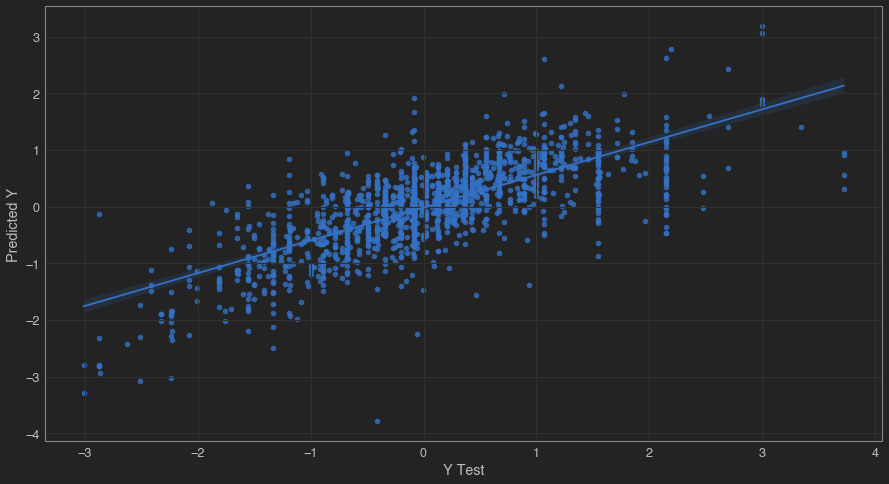

In [362]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_predLR,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RANDOM FOREST

In [176]:
forest = RandomForestRegressor()
forest = forest.fit(x_train, y_train)
y_test_predf = forest.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_predf)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_predf))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_predf))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_predf))))

R2 SCORE GIO :  0.7443368701498086
MAE SCORE GIO :  0.3189468058886083
MSE SCORE GIO :  0.24582474268808405
RMSE SCORE GIO :  0.4958071628043347


In [177]:
RFdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_predf})
RFdata.head(10)

,Actual,Prediction
10000,0.287246,0.638972
2417,-0.862851,-0.205678
5044,0.209450,0.708146
9496,1.550180,1.034271
6502,1.133722,0.860253
9345,0.892433,0.586553
7087,0.124880,0.139987
4911,0.366777,0.340425
7058,-1.029060,0.106538
2432,0.270507,0.252358


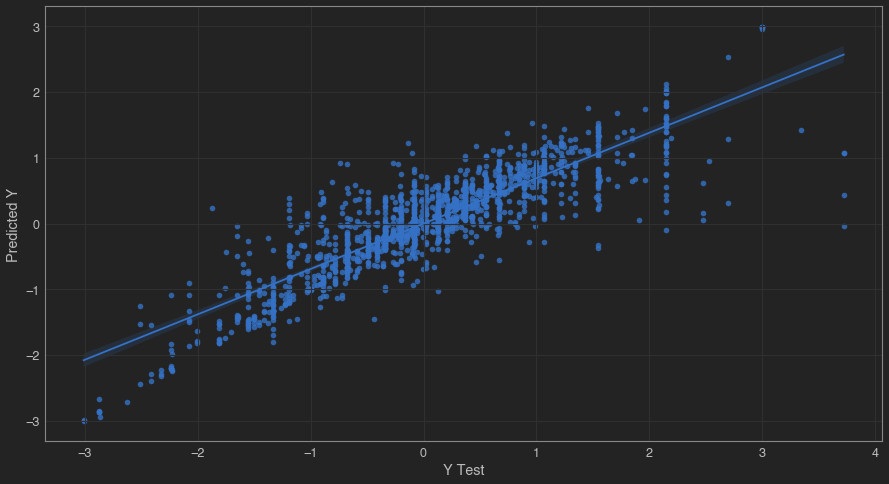

In [178]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_predf,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# GRADIENT BOOST

In [179]:
gradient = GradientBoostingRegressor()
gradient = gradient.fit(x_train, y_train)
y_train_g = gradient.predict(x_train)
y_test_g = gradient.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_g)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_g))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_g))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_g))))

R2 SCORE GIO :  0.6284171199409043
MAE SCORE GIO :  0.42184333695035986
MSE SCORE GIO :  0.35728368784090453
RMSE SCORE GIO :  0.5977321204694496


In [180]:
gradientdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_g})
gradientdata.head(5)

,Actual,Prediction
10000,0.287246,0.638656
2417,-0.862851,-0.247506
5044,0.209450,0.605408
9496,1.550180,0.794507
6502,1.133722,0.765528


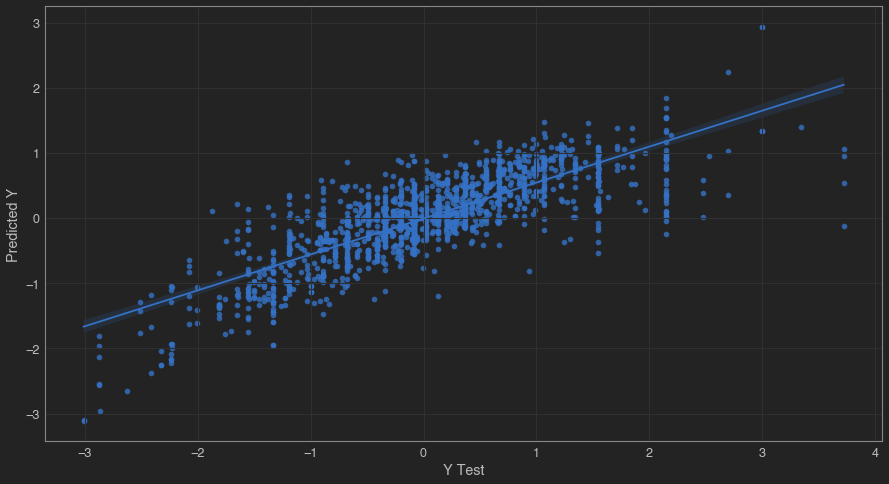

In [181]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_g,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNeighborsRegressor

In [182]:
KNN = KNeighborsRegressor()
KNN = KNN.fit(x_train, y_train)
y_train_K = KNN.predict(x_train)
y_test_K = KNN.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_K)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_K))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_K))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_K))))

R2 SCORE GIO :  0.6169875535482527
MAE SCORE GIO :  0.400358464426934
MSE SCORE GIO :  0.36827342351048
RMSE SCORE GIO :  0.6068553563333523


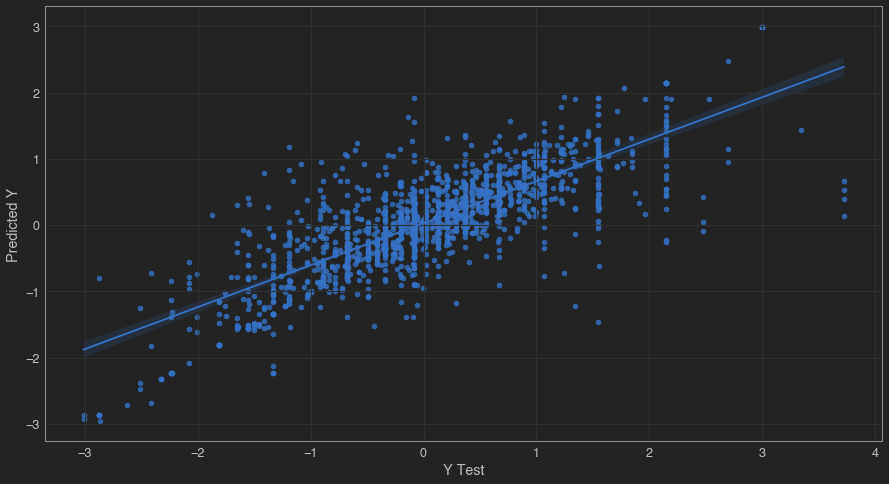

In [183]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_K,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# XGBOOST

In [184]:
xgb = XGBRegressor()
xgb = xgb.fit(x_train, y_train)
y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_xgb)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_xgb))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_xgb))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_xgb))))

R2 SCORE GIO :  0.7428027526622364
MAE SCORE GIO :  0.33180459172301563
MSE SCORE GIO :  0.24729982451492674
RMSE SCORE GIO :  0.49729249392578484


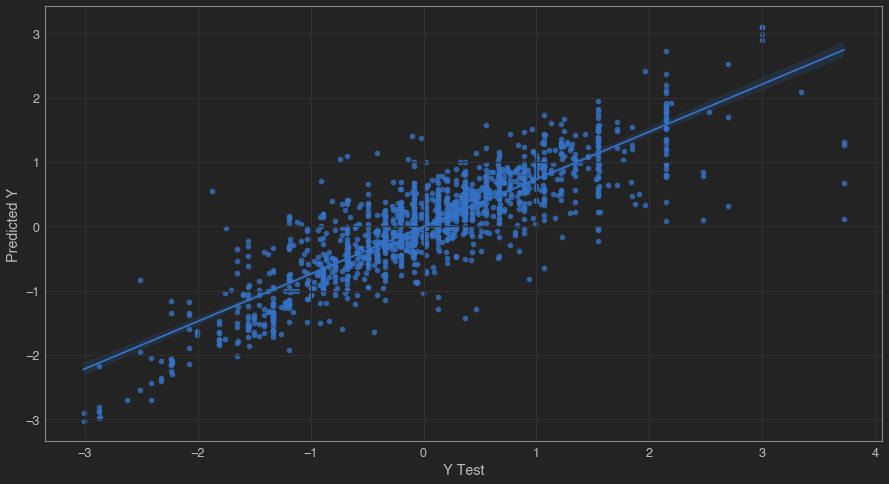

In [185]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_xgb,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Berdasakan hasil diatas, ada 2 model yang akan diambil untuk diproses lebih lanjut di Hyperparameter Tuning yaitu RandomForestRegressor, XGBoost

# GRIDSEARCH CV

https://github.com/scikit-learn/scikit-learn/issues/5115

Random Forest

In [3]:
# param_rf= {
#            "max_depth" : [None,1,3,5,10],
#            "max_features" : [None,'auto']}

# gsRF = GridSearchCV(forest, param_rf, cv=3, n_jobs=-1, verbose=1)

# gsRF = gsRF.fit(x_train, y_train)

In [4]:
# gsRF.best_params_

In [269]:
forest = RandomForestRegressor(max_depth=None,
                               max_features='auto')
forest = forest.fit(x_train, y_train)
y_test_predf = forest.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_predf)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_predf))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_predf))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_predf))))

R2 SCORE GIO :  0.7484587089794046
MAE SCORE GIO :  0.3182771866718444
MSE SCORE GIO :  0.24186151979285905
RMSE SCORE GIO :  0.4917941843829175


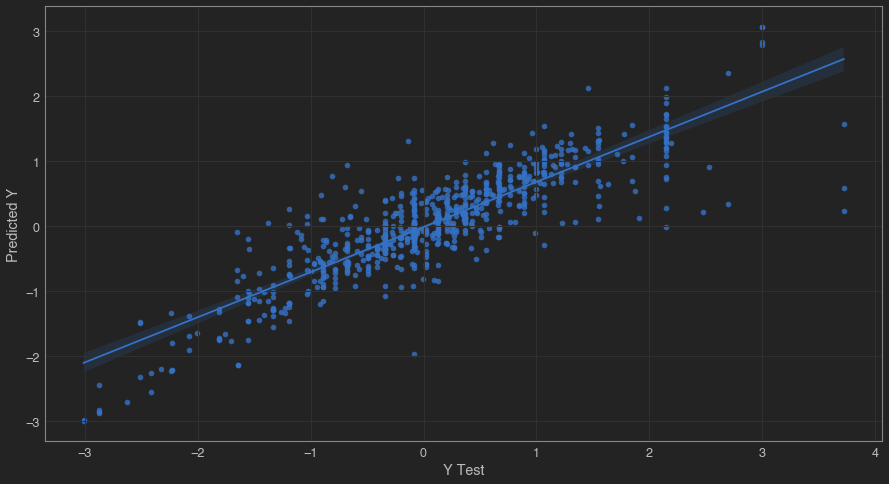

In [221]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_predf,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

XGBoost

In [222]:
# param_grid_xgb  = [{
#             'clf_xgb__gamma':[0,0.1,0.2,0.3], 
#             'clf_xgb__learning_rate': [0.05, 0.3], 
#             'clf_xgb__max_depth':[2,3,5,None], 
#             'clf_xgb__n_estimators': [1000], 
#             'clf_xgb__subsample': [0.05, 0.3, 0.5]
#         }]
                        
# gsxgb = GridSearchCV(XGBRegressor(),
#                      param_grid_xgb, 
#                      cv=3,
#                      n_jobs=-1,
#                      verbose=1) 
        
# gsxgb.fit(x_train, y_train)

In [223]:
# gsxgb.best_params_

In [170]:
xgb = XGBRegressor(gamma = 0,
                   learning_rate = 0.05, 
                   max_depth = None, 
                   n_estimators = 1000, 
                   subsample = 0.5)
xgb = xgb.fit(x_train, y_train)
y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)
print('R2 SCORE GIO : ',(r2_score(y_test, y_test_xgb)))
print("MAE SCORE GIO : ",mean_absolute_error(y_test,y_test_xgb))
print("MSE SCORE GIO : ",mean_squared_error(y_test,y_test_xgb))
print("RMSE SCORE GIO : ",(np.sqrt(mean_squared_error(y_test,y_test_xgb))))

R2 SCORE GIO :  0.7824348260529246
MAE SCORE GIO :  0.30131198540964504
MSE SCORE GIO :  0.20919286615464244
RMSE SCORE GIO :  0.45737606644274953


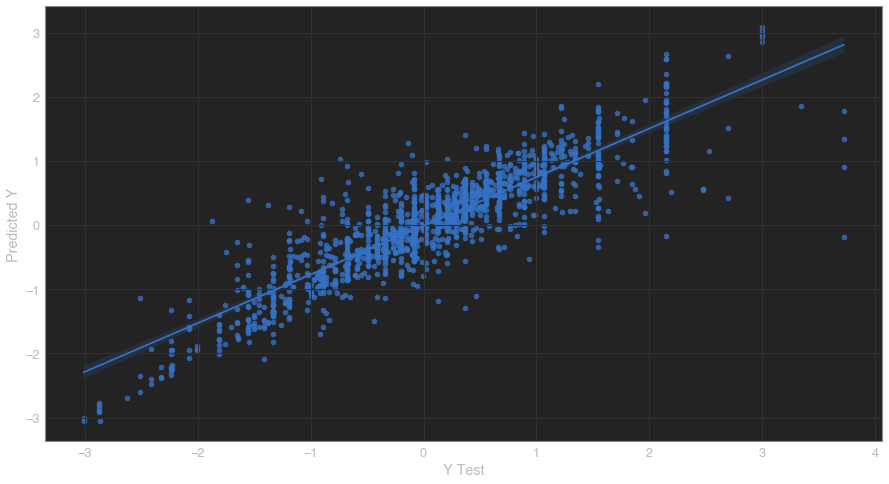

In [177]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,y_test_xgb,fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [190]:
xgbdata = pd.DataFrame({'Actual':y_test, 'Prediction': y_test_xgb})
xgbdata.head(1)

,Actual,Prediction
10000,0.287246,0.213044


In [184]:
0.287246-0.213044

0.07420199999999999

In [191]:
0.074202/0.287246

0.2583221350340823

Berdasarkan data diatas, persentase error nya sekitar 25 %

In [193]:
# with open ('XGBReg','wb') as ML:
#     pickle.dump(xgb,ML)